Name : Chathumini B.G.D.T.

Index Number : 190107T

Question 1

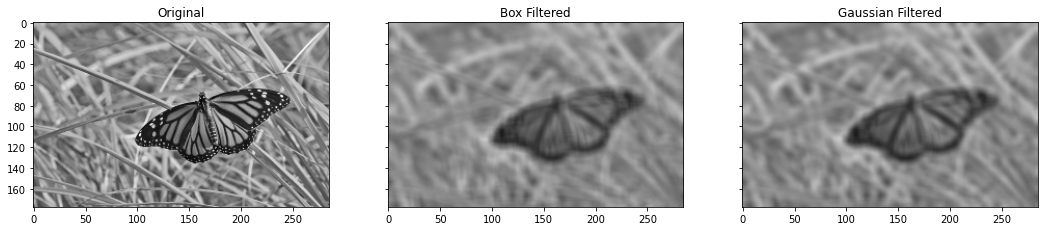

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

butterfly = cv.imread("butterfly.jpg",cv.IMREAD_REDUCED_GRAYSCALE_4)
assert butterfly is not None
#box filter
box_kernel = 1./81.*np.ones((9,9))
butterfly_b = cv.filter2D(butterfly,-1, box_kernel )

#gaussian filter
k_size = 9
sigma = 4
butterfly_g =cv.GaussianBlur(butterfly,(k_size,k_size),sigma)

fig, ax =plt.subplots(1,3, sharex ='all', sharey ='all', figsize=(18,6))
ax[0].imshow(butterfly,cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")

ax[1].imshow(butterfly_b,cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Box Filtered")

ax[2].imshow(butterfly_g ,cmap='gray', vmin=0, vmax=255)
ax[2].set_title("Gaussian Filtered")
plt.show()

Question 3

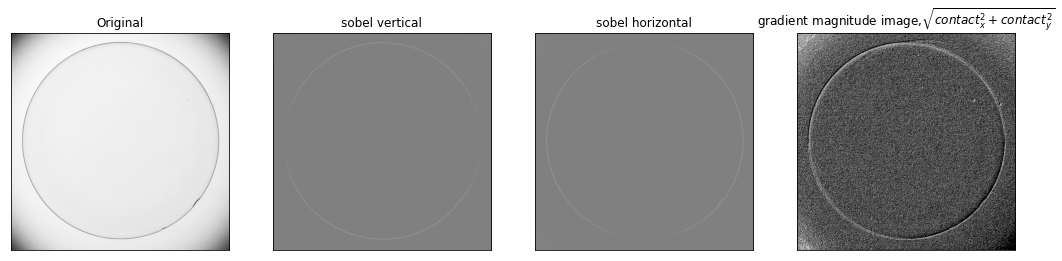

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

contact = cv.imread("contact_lens.tif",cv.IMREAD_GRAYSCALE)
assert contact is not None

sobel_v = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=np.float32)
contact_x = cv.filter2D(contact,-1,sobel_v)
sobel_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=np.float32)
contact_y = cv.filter2D(contact,-1,sobel_h)
grad_mag = np.sqrt(contact_x**2 +contact_y**2)

fig, ax =plt.subplots(1,4, sharex ='all', sharey ='all', figsize=(18,18))

ax[0].imshow(contact,cmap='gray',vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].set_xticks([]),ax[0].set_yticks([])

ax[1].imshow(contact_x,cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("sobel vertical")
ax[1].set_xticks([]),ax[1].set_yticks([])

ax[2].imshow(contact_y ,cmap='gray',  vmin=-1020, vmax=1020)
ax[2].set_title("sobel horizontal")
ax[2].set_xticks([]),ax[2].set_yticks([])

ax[3].imshow(grad_mag ,cmap='gray')
ax[3].set_title("gradient magnitude image,$\sqrt{contact_x^2 +contact_y^2}$")
ax[3].set_xticks([]),ax[3].set_yticks([])
plt.show()

Question 4

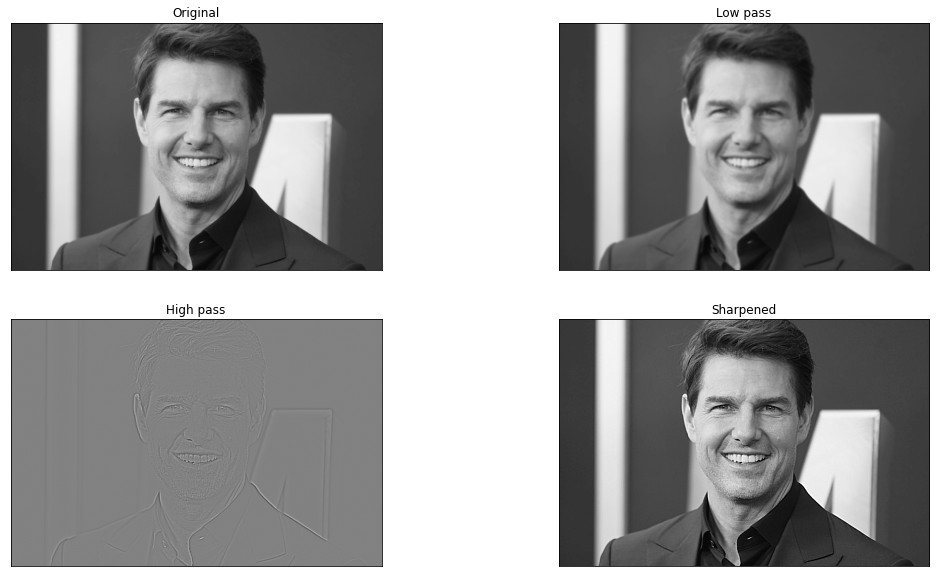

In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

tom = cv.imread("tom.jpg",cv.IMREAD_GRAYSCALE).astype(np.float32)
assert tom is not None

sigma =2
gaussian_1D = cv.getGaussianKernel(5,sigma)
tom_l_p = cv.sepFilter2D(tom,-1,gaussian_1D,gaussian_1D,anchor=(-1,-1),delta=0,borderType=cv.BORDER_REPLICATE)
tom_h_p = tom - tom_l_p 
tom_sharpened= cv.addWeighted(tom,1.0,tom_h_p ,1.5,0)

fig, ax =plt.subplots(2,2, sharex ='all', sharey ='all', figsize=(18,10))
ax[0][0].imshow(tom,cmap='gray', vmin=0, vmax=255)
ax[0][0].set_title("Original")
ax[0][0].set_xticks([]),ax[0][0].set_yticks([])

ax[0][1].imshow(tom_l_p,cmap='gray', vmin=0, vmax=255)
ax[0][1].set_title("Low pass")
ax[0][1].set_xticks([]),ax[0][1].set_yticks([])

ax[1][0].imshow(tom_h_p,cmap='gray')
ax[1][0].set_title("High pass")
ax[1][0].set_xticks([]),ax[1][0].set_yticks([])

ax[1][1].imshow(tom_sharpened,cmap='gray', vmin=0, vmax=255)
ax[1][1].set_title("Sharpened")
ax[1][1].set_xticks([]),ax[1][1].set_yticks([])
plt.show()